In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import numpy as np
import geopandas as gpd
import pandas as pd

# Iran Map

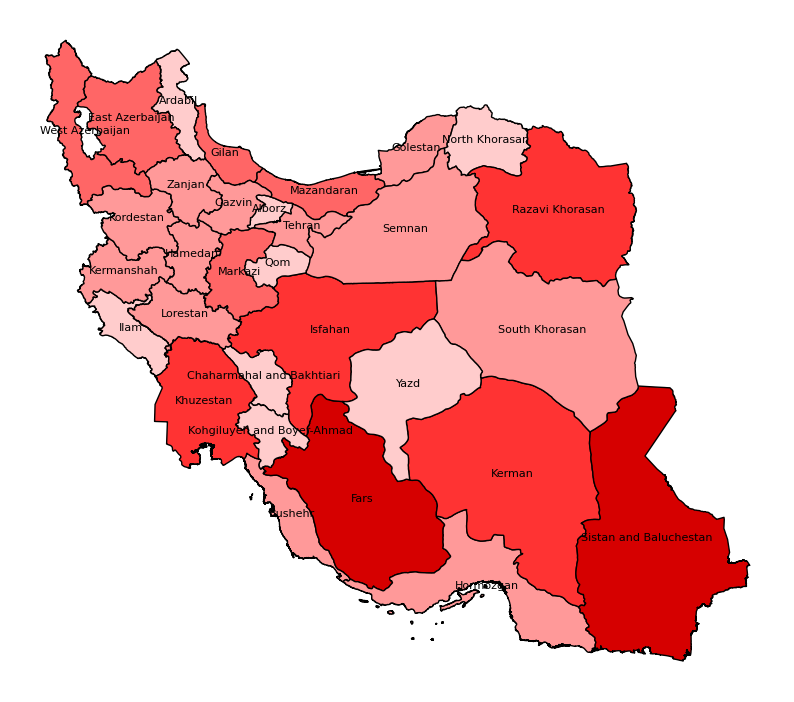

In [5]:
# Load Iran shapefile
iran = gpd.read_file("./iran_map/irn_admbnda_adm1_unhcr_20190514.shp")
iran = iran.sort_values(by="ADM1_EN", ascending=True)

# Read the dataset
df = pd.read_csv("data.csv")

# Filter the dataset to include only relevant columns
df = df[["province", "death"]]

# Group by province and calculate the mean
mean_deaths = df.groupby("province")["death"].mean().reset_index()

# Optional: sort by highest average deaths
dat = mean_deaths.sort_values(by="death", ascending=False)
dat = dat.sort_values(by="province", ascending=True)

iran['ADM1_EN'] = dat['province'].values

# Merge `dat` into `iran` using province names to align them
dat = iran.merge(dat, left_on="ADM1_EN", right_on="province", how="left")

# Compute centroids for label placement
dat = dat.to_crs(epsg=32639)  # UTM Zone 39N (common for Iran)
dat["centroid"] = dat.geometry.centroid

# Extract coordinates for labeling
dat["x"] = dat["centroid"].x
dat["y"] = dat["centroid"].y

# Assign colors based on order count values. This function behaves strangely and IDK why. *_*
def assign_color(x):
    if x <= 200:
        return "#ffcccc"
    elif x <= 400:
        return "#ff9999"
    elif x <= 600:
        return "#ff6666"
    elif x <= 800:
        return "#ff3333" 
    else:
        return "#d60000" 

dat["color_province"] = dat["death"].apply(assign_color)

# Plot
fig, ax = plt.subplots(figsize=(10, 12))
dat.plot(ax=ax, color=dat["color_province"], edgecolor="black")

# Add province labels
for _, row in dat.iterrows():
    ax.text(row["x"], row["y"], row["ADM1_EN"], fontsize=8, ha="center", color="black")

ax.set_axis_off()

plt.savefig("./plots/iran_provinces_death.png", dpi=300, bbox_inches="tight")
plt.show()

# TV vs. num_all

In [5]:
dff = pd.read_csv("data.csv")

# Plot TV_D vs num_all 
sns.scatterplot(data=dff, x="num_all", y="TV_D", color="blue")
plt.title("TV_D vs num_all")
plt.xlabel("num_all")
plt.ylabel("TV_D")
plt.savefig("./plots/TV_D_vs_num_all.png", dpi=300, bbox_inches="tight")
plt.clf()

# Plot TV_O vs num_all 
sns.scatterplot(data=dff, x="num_all", y="TV_O", color="green")
plt.title("TV_O vs num_all")
plt.xlabel("num_all")
plt.ylabel("TV_O")
plt.savefig("./plots/TV_O_vs_num_all.png", dpi=300, bbox_inches="tight")
plt.clf()

# Plot TV_S vs num_all 
sns.scatterplot(data=dff, x="num_all", y="TV_S", color="red")
plt.title("TV_S vs num_all")
plt.xlabel("num_all")
plt.ylabel("TV_S")
plt.savefig("./plots/TV_S_vs_num_all.png", dpi=300, bbox_inches="tight")
plt.clf()

<Figure size 640x480 with 0 Axes>

# Death vs. TV

In [ ]:
sns.scatterplot(data=dff, x="TV_D", y="death", color="blue")
plt.title("death vs TV_D")
plt.xlabel("TV_D")
plt.ylabel("death")
plt.savefig("./plots/death_vs_TV_D.png", dpi=300, bbox_inches="tight")
plt.clf()  # Clear the current figure

sns.scatterplot(data=dff, x="TV_O", y="death", color="green")
plt.title("death vs TV_O")
plt.xlabel("TV_O")
plt.ylabel("death")
plt.savefig("./plots/death_vs_TV_O.png", dpi=300, bbox_inches="tight")
plt.clf()  # Clear the current figure

sns.scatterplot(data=dff, x="TV_S", y="death", color="red")
plt.title("death vs TV_S")
plt.xlabel("TV_S")
plt.ylabel("death")
plt.savefig("./plots/death_vs_TV_S.png", dpi=300, bbox_inches="tight")
plt.clf()  # Clear the current figure

<Figure size 640x480 with 0 Axes>

# Mean of death over years

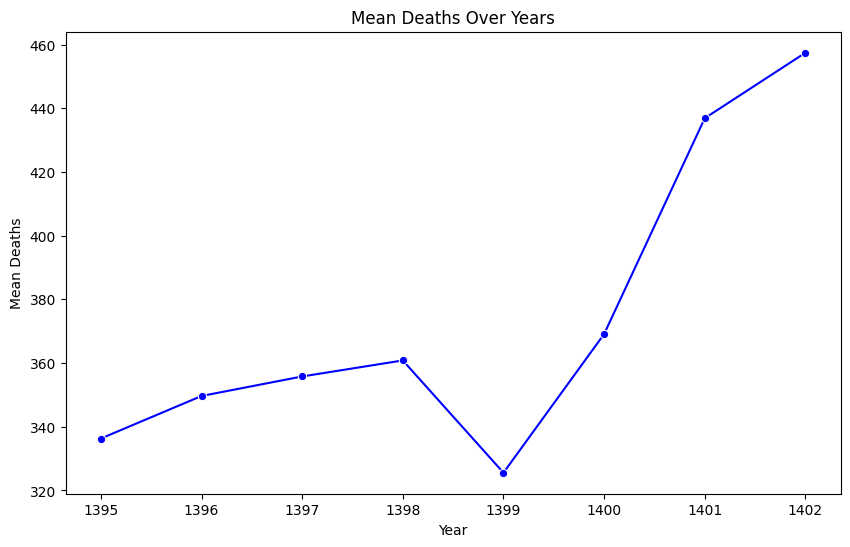

In [11]:
df3 = pd.read_csv("data.csv")
df3 = df3[df3["year"] != 1403]
mean_death_per_year = df3.groupby("year")["death"].mean().reset_index()

# Plot the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_death_per_year, x="year", y="death", marker="o", color="blue")
plt.title("Mean Deaths Over Years")
plt.xlabel("Year")
plt.ylabel("Mean Deaths")
plt.savefig("./plots/mean_deaths_over_years.png", dpi=300, bbox_inches="tight")
plt.show()

# Mean of num_all over years

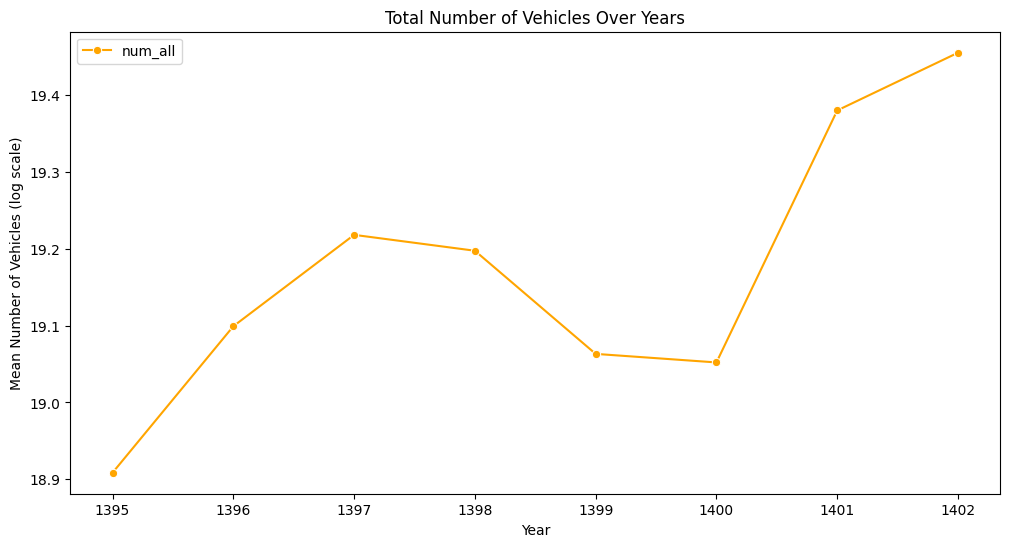

In [12]:
# Group by year and calculate the mean for each TV type
mean_num_trend = df3.groupby("year")[["num_all"]].mean().reset_index()
mean_num_trend["num_all"] = mean_num_trend["num_all"].apply(np.log)

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_num_trend, x="year", y="num_all", marker="o", label="num_all", color="orange")


# Add labels and title
plt.title("Total Number of Vehicles Over Years")
plt.xlabel("Year")
plt.ylabel("Mean Number of Vehicles (log scale)")
plt.legend()

# Set y-axis formatter to plain style (no scientific notation)
plt.savefig("./plots/mean_num_trend.png", dpi=300, bbox_inches="tight")
plt.show()

# Correlation Heatmap

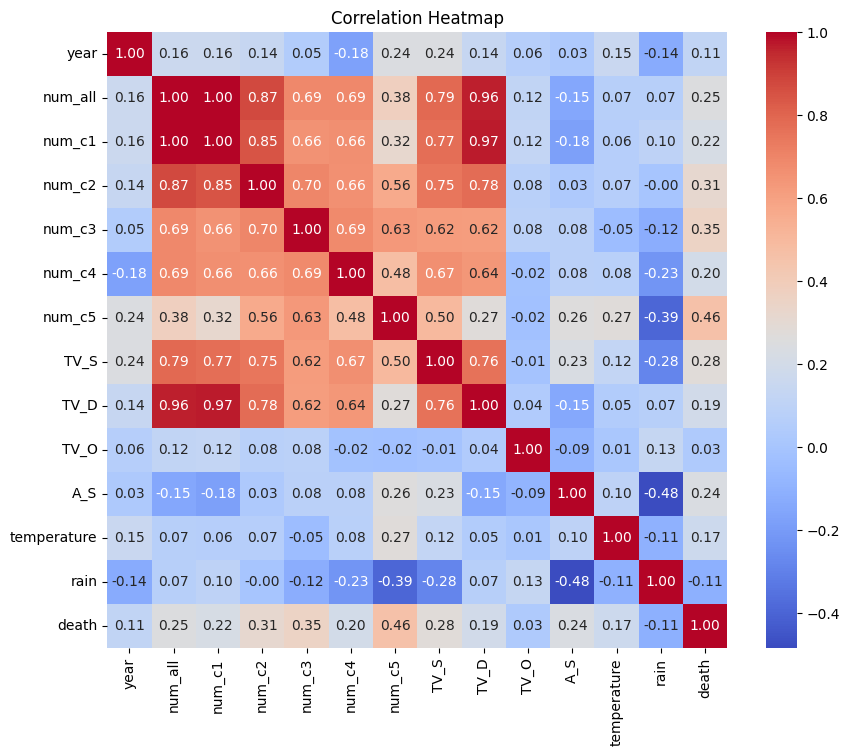

In [10]:
# Compute the correlation matrix
dfff = dff.drop(columns=["province", "file_name"])
correlation_matrix = dfff.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.savefig("./plots/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()